### 1. PID controller simulation

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as wg
from IPython.display import display
n = 100 # time points to plot
tf = 50.0 # final time
SP_start = 2.0 # time of set point change

In [20]:
def process(y,t,u):
    Kp = 4.0
    taup = 3.0
    thetap = 1.0
    if t<(thetap+SP_start):
        dydt = 0.0 # time delay
    else:
        dydt = (1.0/taup) * (-y + Kp * u)
    return dydt

In [38]:
def pidPlot(Kc,tauI,tauD):
    t = np.linspace(0,tf,n) # create time vector
    P= np.zeros(n) # initialize proportional term
    I = np.zeros(n) # initialize integral term
    D = np.zeros(n) # initialize derivative term
    e = np.zeros(n) # initialize error
    OP = np.zeros(n) # initialize controller output
    PV = np.zeros(n) # initialize process variable
    SP = np.zeros(n) # initialize setpoint
    SP_step = int(SP_start/(tf/(n-1))+1) # setpoint start
    SP[0:SP_step] = 0.0 # define setpoint
    SP[SP_step:n] = 4.0 # step up
    y0 = 0.0 # initial condition
    # loop through all time steps
    for i in range(1,n):
    # simulate process for one time step
        ts = [t[i-1],t[i]] # time interval
        y = odeint(process,y0,ts,args=(OP[i-1],)) # compute next step
        y0 = y[1] # record new initial condition
    # calculate new OP with PID
        PV[i] = y[1] # record PV
        e[i] = SP[i] - PV[i] # calculate error = SP - PV
        dt = t[i] - t[i-1] # calculate time step
        P[i] = Kc * e[i] # calculate proportional term
        I[i] = I[i-1] + (Kc/tauI) * e[i] * dt # calculate integral term
        D[i] = -Kc * tauD * (PV[i]-PV[i-1])/dt # calculate derivative term
        OP[i] = P[i] + I[i] + D[i] # calculate new controller output
    # plot PID response
    plt.figure(1,figsize=(15,7))
    plt.subplot(2,2,1)
    plt.plot(t,SP,'k-',linewidth=2,label='Setpoint (SP)')
    plt.plot(t,PV,'r:',linewidth=2,label='Process Variable (PV)')
    plt.legend(loc='best')
    plt.subplot(2,2,2)
    plt.plot(t,P,'g.-',linewidth=2,label=r'Proportional = $K_c \; e(t)$')
    plt.plot(t,I,'b-',linewidth=2,label=r'Integral = $\frac{K_c}{\tau_I} \int_{i=0}^{n_t} e(t) \; dt $')
    plt.plot(t,D,'r--',linewidth=2,label=r'Derivative = $-K_c \tau_D \frac{d(PV)}{dt}$')
    plt.legend(loc='best')
    plt.subplot(2,2,3)
    plt.plot(t,e,'m--',linewidth=2,label='Error (e=SP-PV)')
    plt.legend(loc='best')
    plt.subplot(2,2,4)
    plt.plot(t,OP,'b--',linewidth=2,label='Controller Output (OP)')
    plt.legend(loc='best')
    plt.xlabel('time')

In [39]:
Kc_slide = wg.FloatSlider(value=0.1,min=-0.2,max=1.0,step=0.05)
tauI_slide = wg.FloatSlider(value=4.0,min=0.01,max=5.0,step=0.1)
tauD_slide = wg.FloatSlider(value=0.0,min=0.0,max=1.0,step=0.1)
wg.interact(pidPlot, Kc=Kc_slide, tauI=tauI_slide, tauD=tauD_slide)

interactive(children=(FloatSlider(value=0.1, description='Kc', max=1.0, min=-0.2, step=0.05), FloatSlider(valu…

<function __main__.pidPlot(Kc, tauI, tauD)>

### 2. Implement fuzzy-PID Controller

In [23]:
# Import NumPy and scikit-fuzzy
import numpy as np
import skfuzzy as fuzz

# Generate universe functions
ERROR = np.arange(0, 5, 0.01)
DELTA_ERROR = np.arange(0, 5, 0.01)

Kc = np.arange(-0.2, 1.0, 0.01)
tauI = np.arange(0.01, 5.0, 0.01)
tauD = np.arange(0.0, 1.0, 0.01)

# Membership functions for ERROR
SE = fuzz.gaussmf(ERROR, 0.01, 0.8495)
ME = fuzz.gaussmf(ERROR, 2.5, 0.8495)
BE = fuzz.gaussmf(ERROR, 5, 0.8495)

# Membership functions for DELTA_EROR
SDE = fuzz.gaussmf(DELTA_ERROR, 0.01, 0.8495)
MDE = fuzz.gaussmf(DELTA_ERROR, 2.5, 0.8495)
BDE = fuzz.gaussmf(DELTA_ERROR, 5, 0.8495)





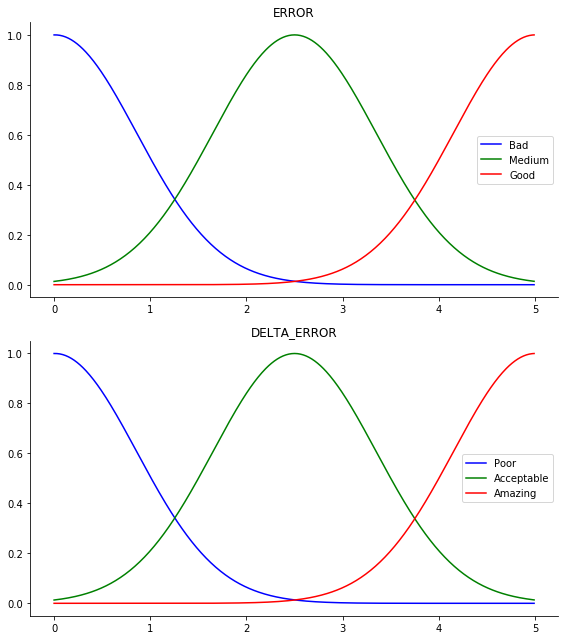

In [24]:
# Visualize these universes and membership functions

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 9))

ax0.plot(ERROR, SE, 'b', linewidth=1.5, label='Bad')
ax0.plot(ERROR, ME, 'g', linewidth=1.5, label='Medium')
ax0.plot(ERROR, BE, 'r', linewidth=1.5, label='Good')
ax0.set_title('ERROR')
ax0.legend()

ax1.plot(DELTA_ERROR, SDE, 'b', linewidth=1.5, label='Poor')
ax1.plot(DELTA_ERROR, MDE, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(DELTA_ERROR, BDE, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('DELTA_ERROR')
ax1.legend()



# Turn off top/right axes
for ax in (ax0, ax1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


In [25]:
# Membership functions for OUTPUT_Kc, OUTPUT_tauI, OUTPUT_tauD
S1 = fuzz.gaussmf(Kc, -0.2, 0.2039)
M1 = fuzz.gaussmf(Kc, 0.4, 0.2039)
B1 = fuzz.gaussmf(Kc, 1, 0.2039)
S2 = fuzz.gaussmf(tauI, 0.01, 0.8476)
M2 = fuzz.gaussmf(tauI, 2.505, 0.8476)
B2 = fuzz.gaussmf(tauI, 5, 0.8476)
S3 = fuzz.gaussmf(tauD, 6.939e-18, 0.1699)
M3 = fuzz.gaussmf(tauD, 0.5, 0.1699)
B3 = fuzz.gaussmf(tauD, 1, 0.1699)

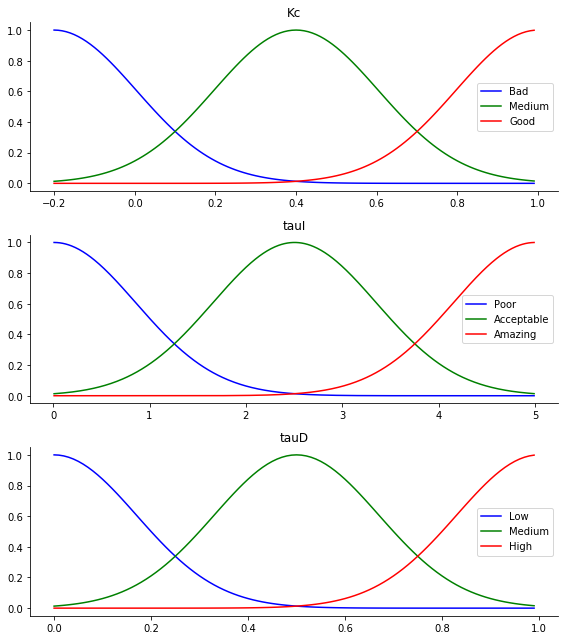

In [26]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(Kc, S1, 'b', linewidth=1.5, label='Bad')
ax0.plot(Kc, M1, 'g', linewidth=1.5, label='Medium')
ax0.plot(Kc, B1, 'r', linewidth=1.5, label='Good')
ax0.set_title('Kc')
ax0.legend()

ax1.plot(tauI, S2, 'b', linewidth=1.5, label='Poor')
ax1.plot(tauI, M2, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(tauI, B2, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('tauI')
ax1.legend()

ax2.plot(tauD, S3, 'b', linewidth=1.5, label='Low')
ax2.plot(tauD, M3, 'g', linewidth=1.5, label='Medium')
ax2.plot(tauD, B3, 'r', linewidth=1.5, label='High')
ax2.set_title('tauD')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

#### 2.1 Fuzzification

In [27]:
# define ERROR_in, DELTA_ERROR_in
ERROR_in = 5;
DELTA_ERROR_in = 5;
ERROR_SMALL = fuzz.interp_membership(ERROR,SE,ERROR_in)
ERROR_MEDIUM = fuzz.interp_membership(ERROR,ME,ERROR_in)
ERROR_BIG = fuzz.interp_membership(ERROR,BE,ERROR_in)

DELTA_ERROR_SMALL = fuzz.interp_membership(DELTA_ERROR, SDE, DELTA_ERROR_in)
DELTA_ERROR_MEDIUM = fuzz.interp_membership(DELTA_ERROR, MDE, DELTA_ERROR_in)
DELTA_ERROR_BIG = fuzz.interp_membership(DELTA_ERROR, BDE, DELTA_ERROR_in)

#### 2.2 Generate Fuzzy rules

In [28]:
# RULE for OUTPUT_Kc
# use OR operator

rule1 = np.fmax(ERROR_SMALL, DELTA_ERROR_SMALL)
rule2 = np.fmax(ERROR_SMALL, DELTA_ERROR_MEDIUM)
rule3 = np.fmax(ERROR_SMALL, DELTA_ERROR_BIG)
rule4 = np.fmax(ERROR_MEDIUM, DELTA_ERROR_SMALL)
rule5 = np.fmax(ERROR_MEDIUM, DELTA_ERROR_MEDIUM)
rule6 = np.fmax(ERROR_MEDIUM, DELTA_ERROR_BIG)
rule7 = np.fmax(ERROR_BIG, DELTA_ERROR_SMALL)
rule8 = np.fmax(ERROR_BIG, DELTA_ERROR_MEDIUM)
rule9 = np.fmax(ERROR_BIG, DELTA_ERROR_BIG)

In [29]:
# RULE for tau_I
# use OR operator
rule10 = np.fmax(ERROR_SMALL, DELTA_ERROR_SMALL)
rule11 = np.fmax(ERROR_SMALL, DELTA_ERROR_MEDIUM)
rule12 = np.fmax(ERROR_SMALL, DELTA_ERROR_BIG)
rule13 = np.fmax(ERROR_MEDIUM, DELTA_ERROR_SMALL)
rule14 = np.fmax(ERROR_MEDIUM, DELTA_ERROR_MEDIUM)
rule15 = np.fmax(ERROR_MEDIUM, DELTA_ERROR_BIG)
rule16 = np.fmax(ERROR_BIG, DELTA_ERROR_SMALL)
rule17 = np.fmax(ERROR_BIG, DELTA_ERROR_MEDIUM)
rule18 = np.fmax(ERROR_BIG, DELTA_ERROR_BIG)

In [30]:
# RULE for tau_D
# use OR operator
rule19 = np.fmax(ERROR_SMALL, DELTA_ERROR_SMALL)
rule20 = np.fmax(ERROR_SMALL, DELTA_ERROR_MEDIUM)
rule21 = np.fmax(ERROR_SMALL, DELTA_ERROR_BIG)
rule22 = np.fmax(ERROR_MEDIUM, DELTA_ERROR_SMALL)
rule23 = np.fmax(ERROR_MEDIUM, DELTA_ERROR_MEDIUM)
rule24 = np.fmax(ERROR_MEDIUM, DELTA_ERROR_BIG)
rule25 = np.fmax(ERROR_BIG, DELTA_ERROR_SMALL)
rule26 = np.fmax(ERROR_BIG, DELTA_ERROR_MEDIUM)
rule27 = np.fmax(ERROR_BIG, DELTA_ERROR_BIG)

In [31]:
# IMPLICATION for Kc
imp1 = np.fmax(rule1, S1)
imp2 = np.fmax(rule2, S1)
imp3 = np.fmax(rule3, S1)
imp4 = np.fmax(rule4, M1)
imp5 = np.fmax(rule5, M1)
imp6 = np.fmax(rule6, M1)
imp7 = np.fmax(rule7, B1)
imp8 = np.fmax(rule7, B1)
imp9 = np.fmax(rule7, B1)

In [32]:
# IMPLICATION for tauI
imp10 = np.fmax(rule10, S2)
imp11 = np.fmax(rule11, S2)
imp12 = np.fmax(rule12, S2)
imp13 = np.fmax(rule13, M2)
imp14 = np.fmax(rule14, M2)
imp15 = np.fmax(rule15, M2)
imp16 = np.fmax(rule16, B2)
imp17 = np.fmax(rule17, B2)
imp18 = np.fmax(rule18, B2)

In [33]:
# IMPLICATION for tauD
imp19 = np.fmax(rule19, S3)
imp20 = np.fmax(rule20, S3)
imp21 = np.fmax(rule21, S3)
imp22 = np.fmax(rule22, M3)
imp23 = np.fmax(rule23, M3)
imp24 = np.fmax(rule24, M3)
imp25 = np.fmax(rule25, B3)
imp26 = np.fmax(rule26, B3)
imp27 = np.fmax(rule27, B3)

In [34]:
# Aggregate all output
aggregate_membership1 = np.fmax(imp1, np.fmax(imp2, np.fmax(imp3, np.fmax(imp4, np.fmax(imp5, np.fmax(imp6, np.fmax(imp7, np.fmax(imp8,imp9))))))))
aggregate_membership2 = np.fmax(imp10, np.fmax(imp11, np.fmax(imp12, np.fmax(imp13, np.fmax(imp14, np.fmax(imp15, np.fmax(imp16, np.fmax(imp17,imp18))))))))
aggregate_membership3 = np.fmax(imp19, np.fmax(imp20, np.fmax(imp21, np.fmax(imp22, np.fmax(imp23, np.fmax(imp24, np.fmax(imp25, np.fmax(imp26,imp27))))))))


# equivalent to the following,generate three fuzzy sets for Kc: SMALL, MEDIUM and BIG, aggregate it and defuzzify 
# use Kc as an example
#Kc_SMALL = np.fmax(np.fmax(imp1,imp2),imp3)
#kc_MEDIUM= np.fmax(np.fmax(imp4,imp5),imp6)
#Kc_BIG = np.fmax(np.fmax(imp7,imp8),imp9)

#Kc_out = np.fmax(np.fmax(Kc_SMALL,kc_MEDIUM),Kc_BIG)
#result_Kc = fuzz.defuzz(Kc, Kc_out , 'centroid')

In [35]:
# Defuzzification
result_Kc = fuzz.defuzz(Kc, aggregate_membership1 , 'centroid')
result_tauI = fuzz.defuzz(tauI, aggregate_membership2 , 'centroid')
result_tauD = fuzz.defuzz(tauD, aggregate_membership3 , 'centroid')
print (result_Kc)
print (result_tauI)
print (result_tauD)

0.3931475707521346
2.4981591681568136
0.49314447457013927


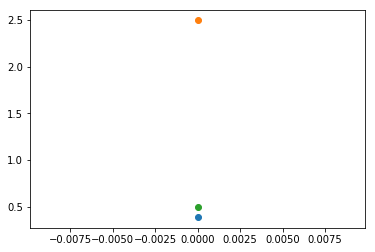

In [36]:
import matplotlib.pyplot as plt
plt.scatter(0,result_Kc)
plt.scatter(0,result_tauI)
plt.scatter(0,result_tauD)

Have a nice day!